In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path = '/home/ajana/VPF/'

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [6]:
fid_data = []
inphase_data = []

for filename in os.listdir(path):
    if filename.startswith('vpf_MDgalaxies'):
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[0]))
        fid_data.append(_temp)


for filename in os.listdir(path):
    if filename.startswith('vpf_galaxies'):
        pos = extractIndex(filename)
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[pos]))
        inphase_data.append(_temp)


In [7]:
full_data = np.vstack((fid_data[:1],inphase_data))
del inphase_data
del fid_data
np.random.shuffle(full_data)

In [45]:
X_data = full_data[:,10:-10]
y_data = full_data[:,-5:]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [47]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=1000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=True,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [48]:
reg_rf.score(X_test,y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.46889034120585776

In [49]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

[ 0.02339214 -0.02411726  1.56111795  5.70187338  1.49433451]


In [50]:
y_rf = pd.DataFrame(y_rf)
y_test = pd.DataFrame(y_test)

In [51]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.997391,13.979607,1.209193,0.932674,0.833991,12.979563,13.980492,1.166820,0.914699,0.993445
1,13.038700,14.118943,0.820808,0.861827,1.017580,13.024827,14.093502,0.781133,0.781248,1.003727
2,13.171270,14.140087,0.810279,1.196471,1.028258,13.193247,14.084344,0.883906,0.961086,1.025908
3,12.962807,14.112094,0.882289,1.427836,0.958286,13.009309,14.011821,0.997386,1.078674,0.901363
4,13.127094,14.006384,0.993925,1.023805,0.898325,13.148515,14.075578,1.040517,1.004161,0.990345
...,...,...,...,...,...,...,...,...,...,...
495,13.027036,14.101396,1.146694,1.302287,1.035670,13.050901,14.003298,1.185157,0.947854,0.918874
496,13.169452,14.070617,0.850604,0.871754,0.926208,13.178292,14.037792,0.854549,1.258733,0.838599
497,12.988436,14.153167,1.072175,0.872732,0.806365,13.003159,14.057530,1.094843,1.119576,1.051491
498,13.011099,14.149694,0.807917,1.285239,0.812240,12.994984,13.995261,0.776424,0.985056,0.999323


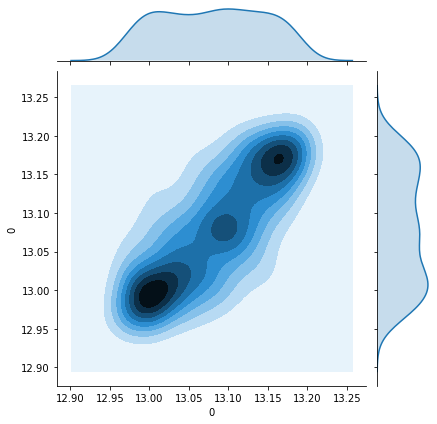

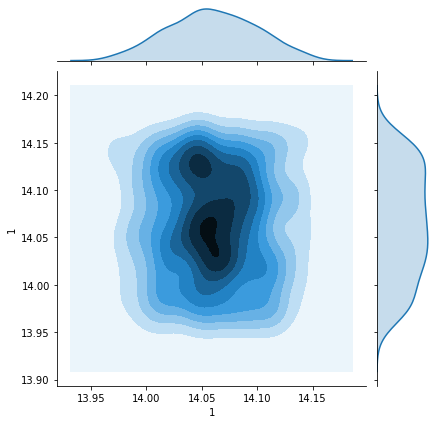

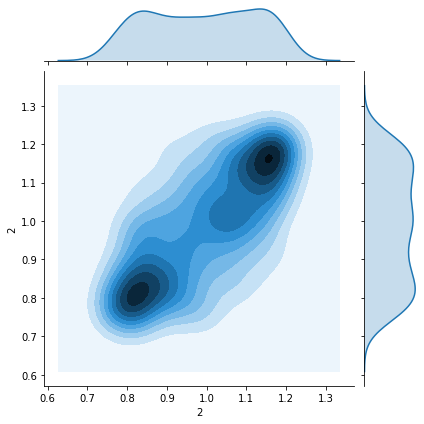

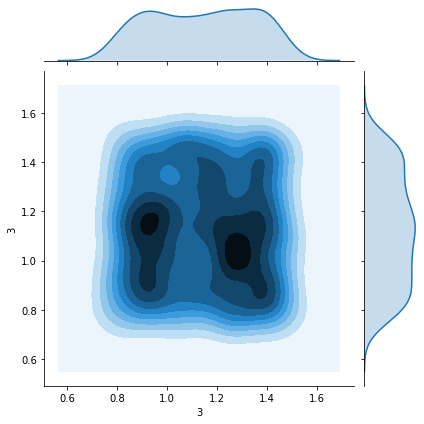

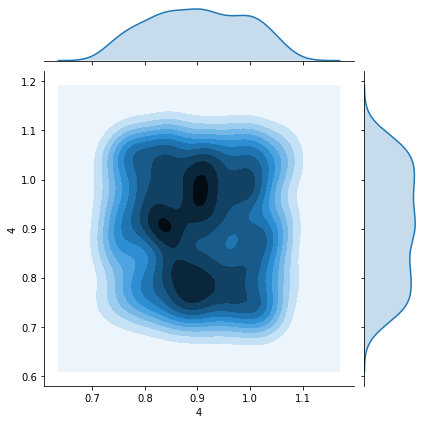

In [52]:
sns.jointplot(y_rf.iloc[:,0],y_test.iloc[:,0],kind = 'kde')
sns.jointplot(y_rf.iloc[:,1],y_test.iloc[:,1],kind = 'kde')
sns.jointplot(y_rf.iloc[:,2],y_test.iloc[:,2],kind = 'kde')
sns.jointplot(y_rf.iloc[:,3],y_test.iloc[:,3],kind = 'kde')
sns.jointplot(y_rf.iloc[:,4],y_test.iloc[:,4],kind = 'kde')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

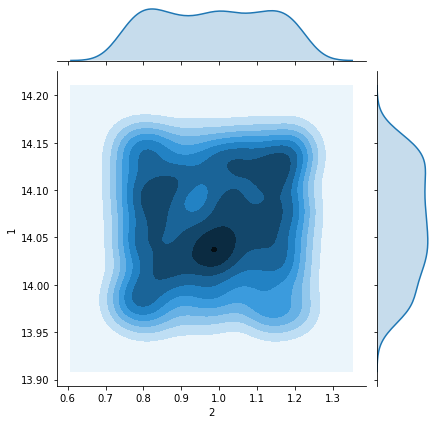

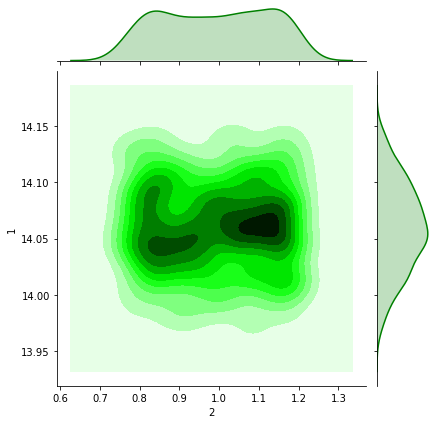

In [53]:
sns.jointplot(y_test.iloc[:,2],y_test.iloc[:,1],kind = "kde")
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,1],kind = 'kde',color='green')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

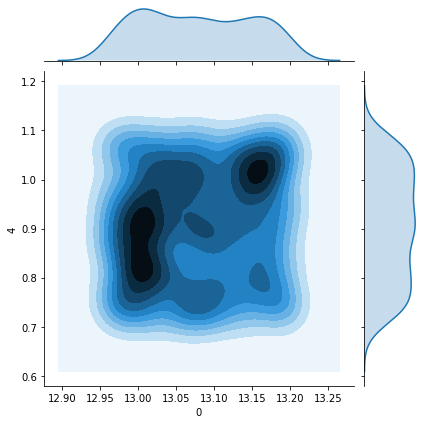

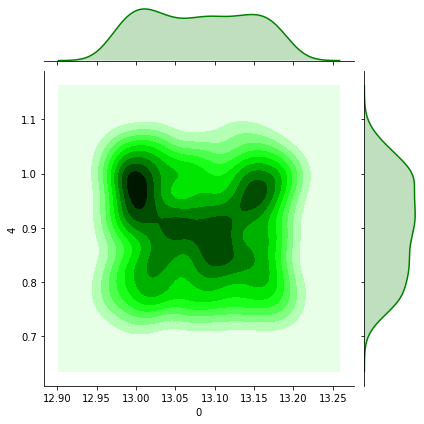

In [17]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,4],kind = "kde")
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,4],kind = 'kde',color='green')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

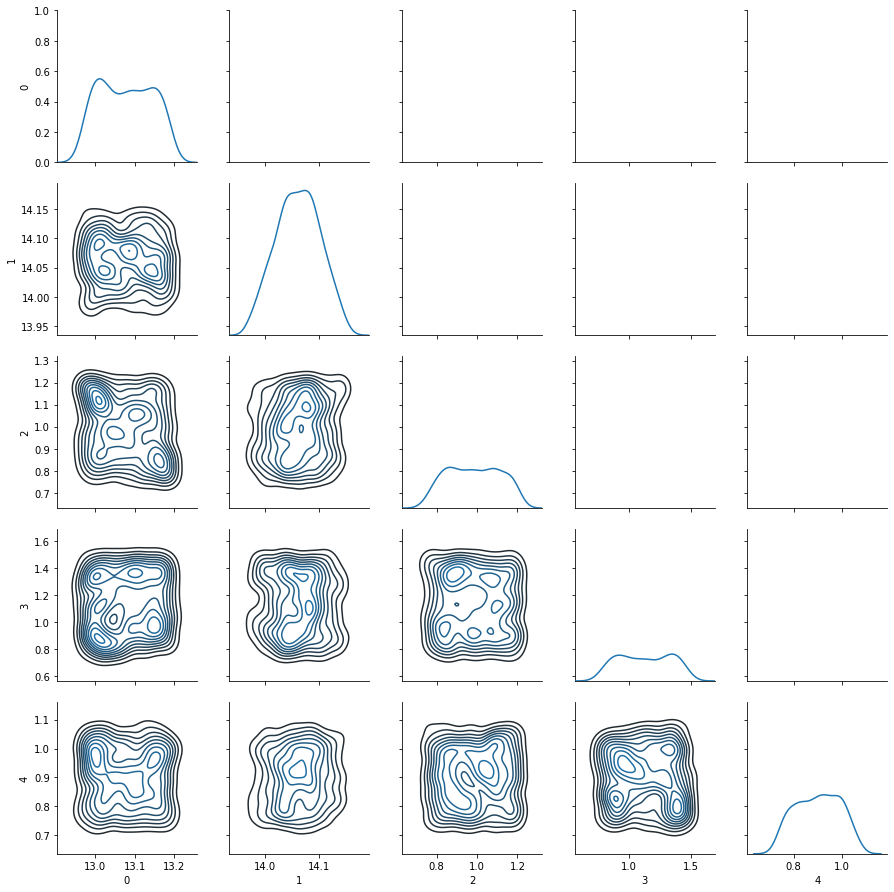

In [18]:
g = sns.PairGrid(y_rf)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

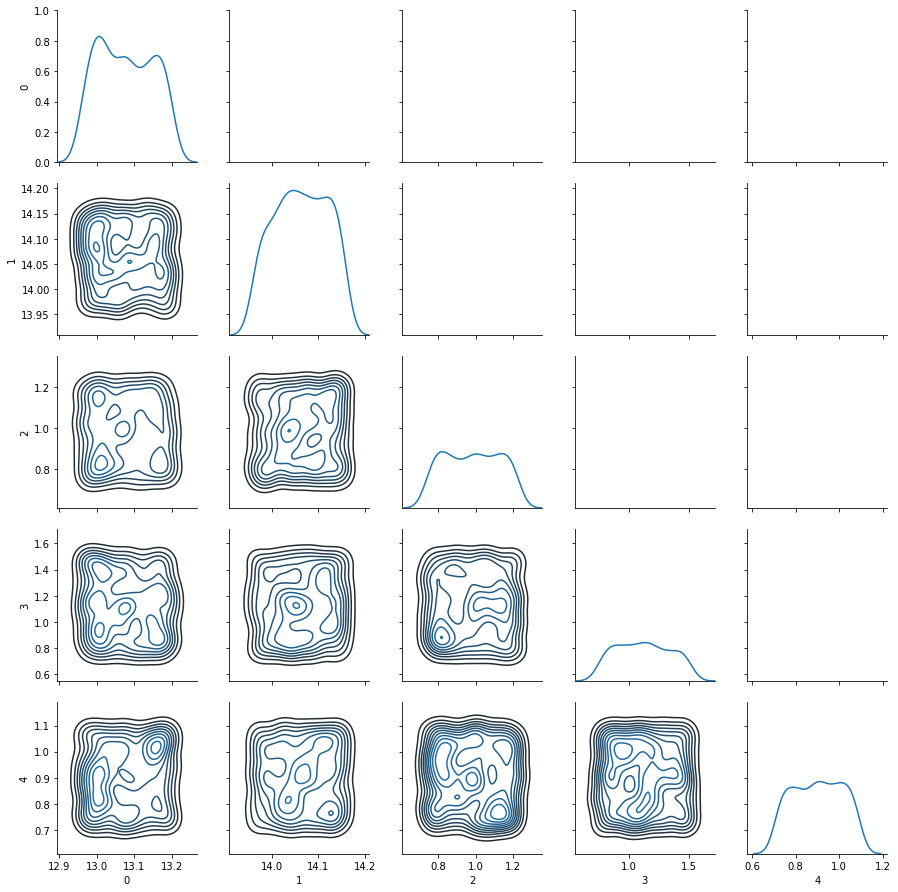

In [19]:
g = sns.PairGrid(y_test)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

(array([17., 37., 46., 80., 76., 77., 79., 48., 30., 10.]),
 array([13.97096747, 13.98960747, 14.00824747, 14.02688747, 14.04552747,
        14.06416746, 14.08280746, 14.10144746, 14.12008746, 14.13872746,
        14.15736746]),
 <a list of 10 Patch objects>)

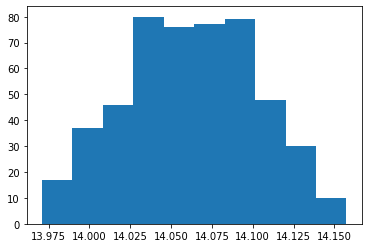

In [20]:
plt.hist(y_rf.iloc[:,1])

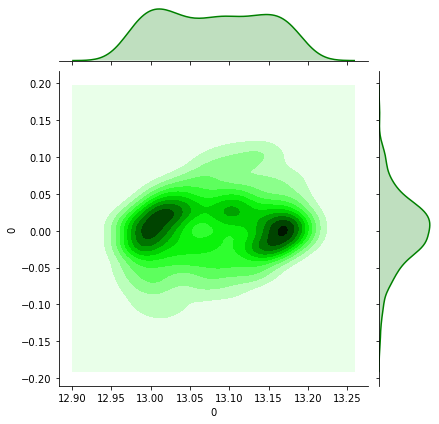

In [21]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

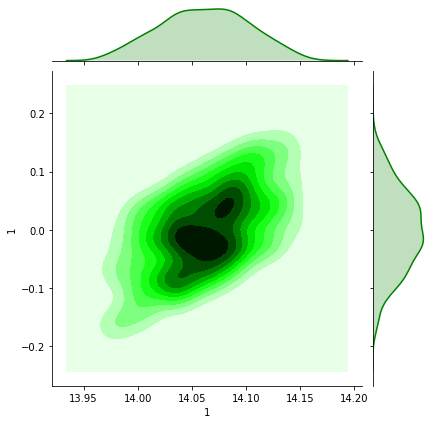

In [30]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

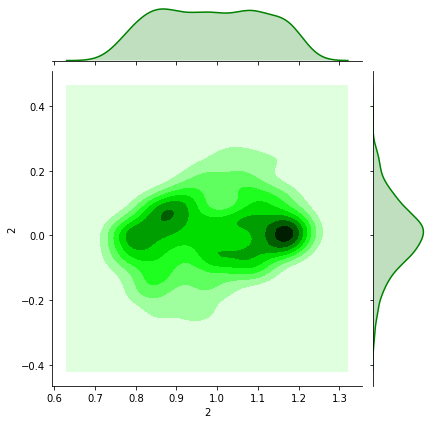

In [31]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

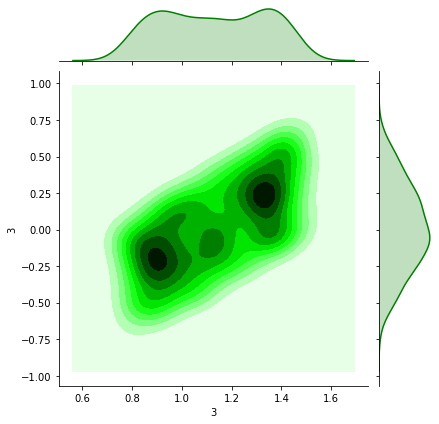

In [32]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

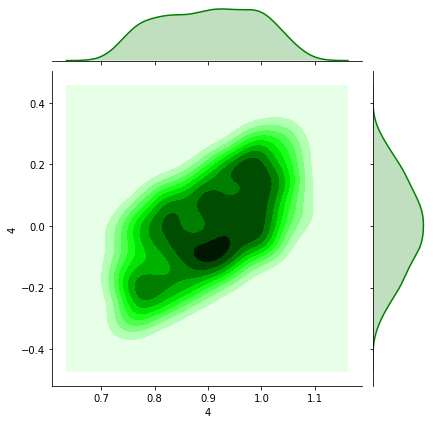

In [33]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [26]:

max_depth = 40
n_estimators = 250

In [27]:
'''
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
     """Return the average MAE over 5 CV folds of random forest model.
    
     Keyword argument:
     n_estimators -- the number of trees in the forest
     """
   #fit Random Forest Regressor
     reg_rf = RandomForestRegressor(
         n_estimators=n_estimators,
         criterion='mse',
         max_depth=None,
         min_samples_split=0.5,
         min_samples_leaf=1,
         min_weight_fraction_leaf=0.0,
         max_features='auto',
         max_leaf_nodes=None,
         min_impurity_decrease=0.0,
         min_impurity_split=None,
         bootstrap=True,
         oob_score=False,
         n_jobs=None,
         random_state=None,
         verbose=0,
         warm_start=False,
     )
     scores = -1 * cross_val_score(reg_rf, X_data, y_data,
                                   cv=4,
                                   scoring='neg_mean_absolute_error')
     return scores.mean()
'''

'\nfrom sklearn.model_selection import cross_val_score\n\ndef get_score(n_estimators):\n     """Return the average MAE over 5 CV folds of random forest model.\n    \n     Keyword argument:\n     n_estimators -- the number of trees in the forest\n     """\n   #fit Random Forest Regressor\n     reg_rf = RandomForestRegressor(\n         n_estimators=n_estimators,\n         criterion=\'mse\',\n         max_depth=None,\n         min_samples_split=0.5,\n         min_samples_leaf=1,\n         min_weight_fraction_leaf=0.0,\n         max_features=\'auto\',\n         max_leaf_nodes=None,\n         min_impurity_decrease=0.0,\n         min_impurity_split=None,\n         bootstrap=True,\n         oob_score=False,\n         n_jobs=None,\n         random_state=None,\n         verbose=0,\n         warm_start=False,\n     )\n     scores = -1 * cross_val_score(reg_rf, X_data, y_data,\n                                   cv=4,\n                                   scoring=\'neg_mean_absolute_error\')\n     

In [28]:
results = {}
for i in range(1,10):
     results[50*i] = get_score(50*i) # Your code here

NameError: name 'get_score' is not defined

In [ ]:
n_estimators_best = min(results, key=results.get)
print (n_estimators_best)

In [ ]:
plt.plot(list(results.keys()), list(results.values()))

In [ ]:
np.array(results.keys())

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,500,50)],
    "max_depth":[None,5,10,15,20,25,30],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters, cv=5)
clf.fit(X_train,y_train)


In [ ]:
sorted(clf.cv_results_.keys())

In [ ]:
grid = clf.predict(X_test)

In [ ]:
print (np.mean((grid - y_test)**2/(grid**2), axis=0))

In [ ]:

pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(grid)], axis = 1)

In [ ]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,1],kind = "kde")
sns.jointplot(grid[:,0],grid[:,1],kind = 'kde',color='green')

In [ ]:
g = sns.PairGrid(pd.DataFrame())
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)